<a href="https://colab.research.google.com/github/Atomator/Scratch-Neural-Network/blob/master/Scratch_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Initialization Cell; Gets MNIST data from github

!git clone https://github.com/hsjeong5/MNIST-for-Numpy.git
%cd MNIST-for-Numpy
from google.colab import files
import mnist
mnist.init()

Cloning into 'MNIST-for-Numpy'...
remote: Enumerating objects: 47, done.
remote: Total 47 (delta 0), reused 0 (delta 0), pack-reused 47
Unpacking objects: 100% (47/47), done.
/content/MNIST-for-Numpy
Download complete.
Save complete.


In [ ]:
#@title Neural Network Parameters
hidden_layer_nodes = 25 #@param {type:"integer"}
time_to_train = 100 #@param {type:"integer"}
# Runs backpropigation, then prints accuracy from training data (not reliable)

import numpy as np

from google.colab import files
import mnist

x_train, t_train, x_test, t_test = mnist.load()

# Seperating data in X and Y, along with m
X = x_train
X = (X - np.amin(X))/(np.amax(X)-np.amin(X))
X = np.insert(X, 0, 1, axis=1) 
y = t_train.T
m = np.shape(X)

Y = np.zeros([y.shape[0],10])
for i in range (y.shape[0]):
  Y[i, y[i]] = 1




# Weights and ouput of the function
epsilon = 0.12
weights1 = np.random.rand(hidden_layer_nodes,m[1]) * (2 * epsilon) - epsilon
weights2 = np.random.rand(10,hidden_layer_nodes+1) * (2 * epsilon) - epsilon
output = np.zeros(Y.shape)

# Learning rate (alpha)
alpha = 0.1

# Sigmoid Function
def sigmoid(z):
  g = (1 / (1 + np.exp(-z)))
  return g

# Sigmoid Gradient
def sigmoid_derivative(z):
  g = sigmoid(z)
  g = g * (1-g)
  return g

def costFunction(results):
  mul0 = ((Y) * np.log(results))
  mul1 = ((1 - Y) * np.log(1 - (results)))
  # Preforms the final cost function
  J = (1 / m[0]) * np.sum(np.sum(mul0 - mul1))
  return J

def costOtherFunction(yFinal):
  cost = np.sum((yFinal - Y) ** 2)
  return cost
    
def NN(x):
  global weights1
  global weights2
  global output
  for i in range (x):
    a1 = X.T
    z2 = np.dot(weights1, a1)
    a2 = sigmoid(z2).T
    a2 = np.insert(a2, 0, 1, axis=1).T
    z3 = np.dot(weights2, a2)
    output = sigmoid(z3).T
    
    d3 = (output - Y)
    d2 = np.dot(d3,weights2) * (np.insert(sigmoid_derivative(z2).T, 0, 1, axis=1))
   
    d_weights1 = np.dot(a1,d2[:,1:]).T/m[0]
    d_weights2 = np.dot(a2,d3).T/m[0]
    
    weights1 -= d_weights1
    weights2 -= d_weights2
    
def predict(results):
  p = np.zeros(y.shape)
  for i in range (np.shape(results)[0]):
    indexLocation = np.argwhere(results[i,:] == np.amax(results[i,:]))
    p[i] = indexLocation[0]
  return p


NN(time_to_train)
accuracy = (np.double(predict(output) == y)).mean()*100
print(accuracy)

86.94333333333333


In [ ]:
# Feeds forward then prints accuracy on test data

Xt = x_test
Xt = (Xt - np.amin(Xt))/(np.amax(Xt)-np.amin(Xt))
Xt = np.insert(Xt, 0, 1, axis=1) 
yt = t_test.T
Yt = np.zeros([yt.shape[0],10])
for i in range (yt.shape[0]):
  locale = yt[i]
  Yt[i,locale] = 1

output_test = np.zeros(Yt.shape)  
  
def feedforward(x):
  global output_test
  a1 = x.T
  z2 = np.dot(weights1, a1)
  a2 = sigmoid(z2).T
  a2 = np.insert(a2, 0, 1, axis=1).T
  z3 = np.dot(weights2, a2)
  output_test = sigmoid(z3).T

def predicttest(results):
  p = np.zeros(yt.shape)
  for i in range (np.shape(results)[0]):
    indexLocation = np.argwhere(results[i,:] == np.amax(results[i,:]))
    p[i] = indexLocation[0]
  return p

feedforward(Xt)
accuracy = (np.double(predicttest(output_test) == yt)).mean()*100
print(accuracy)

72.14


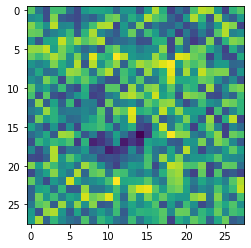

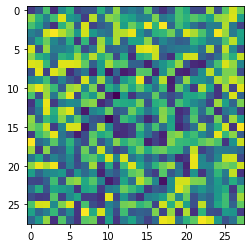

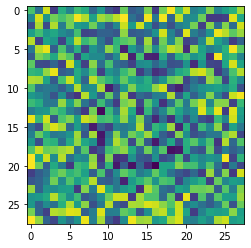

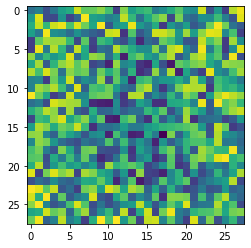

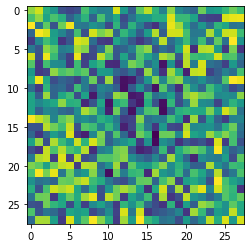

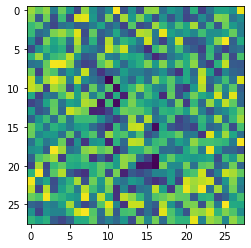

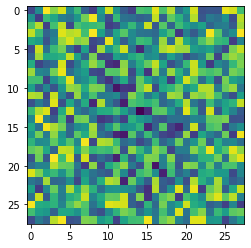

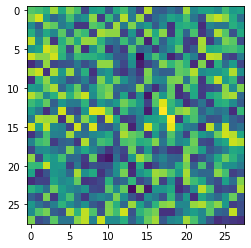

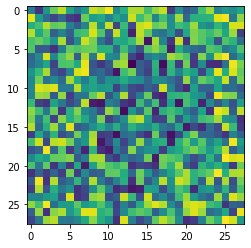

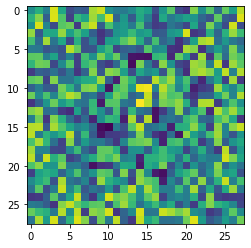

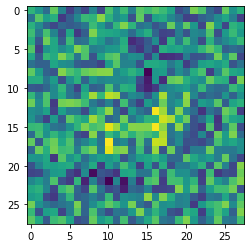

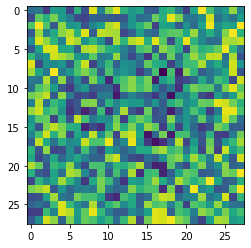

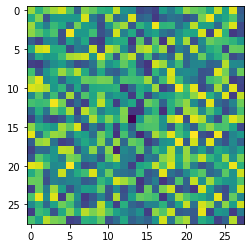

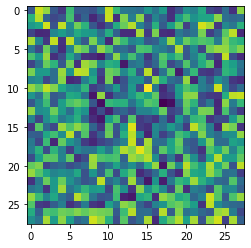

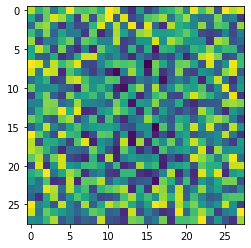

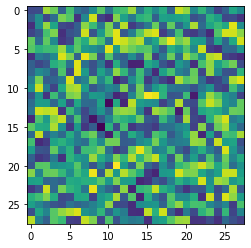

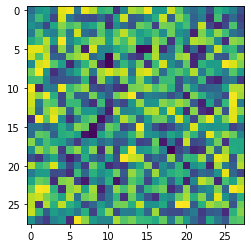

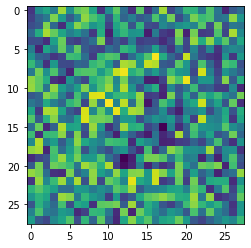

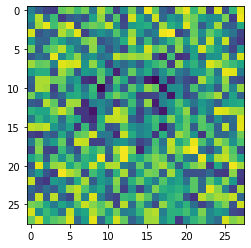

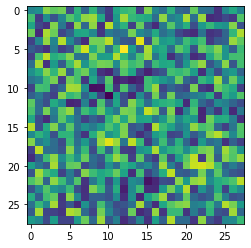

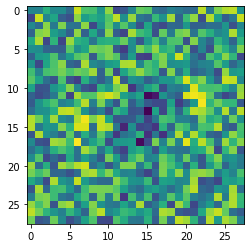

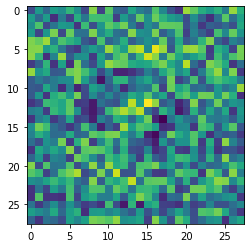

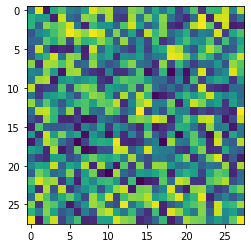

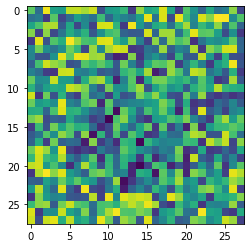

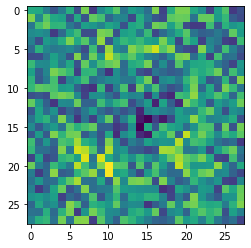

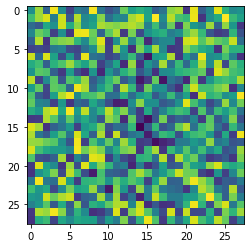

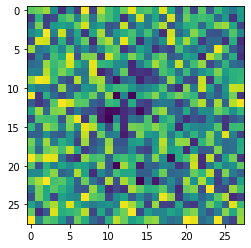

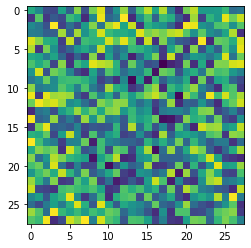

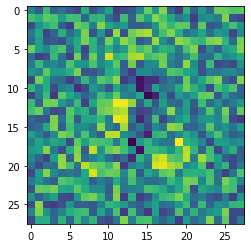

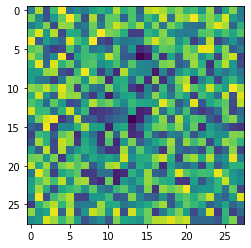

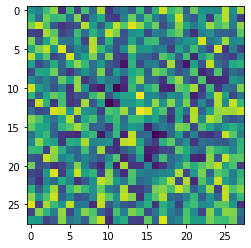

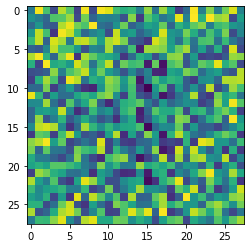

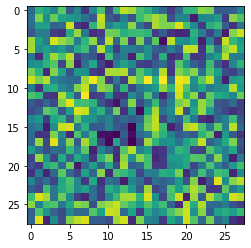

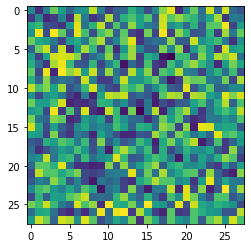

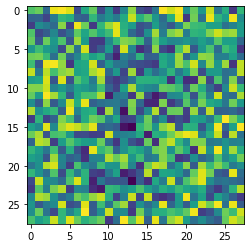

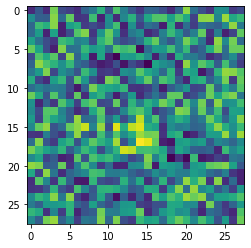

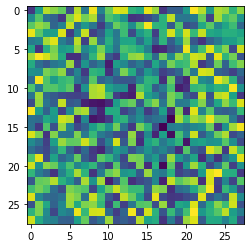

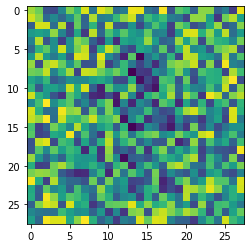

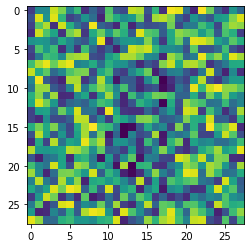

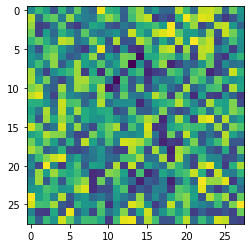

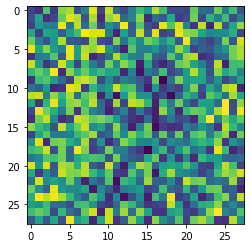

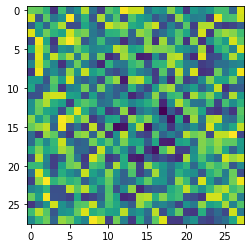

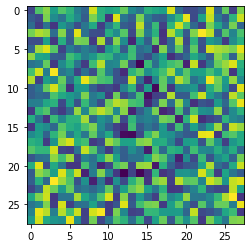

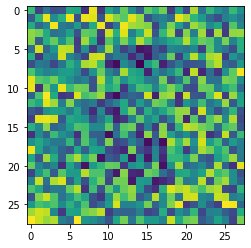

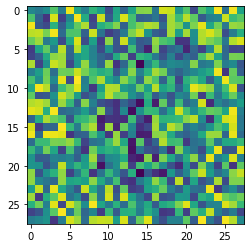

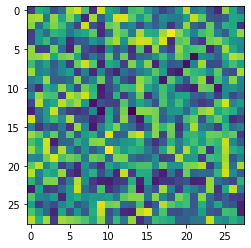

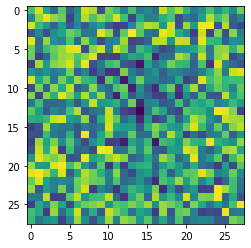

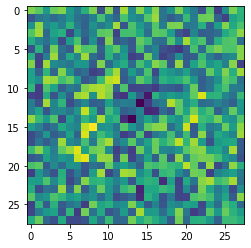

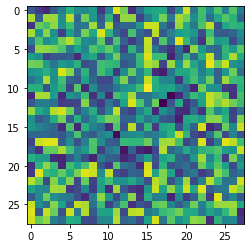

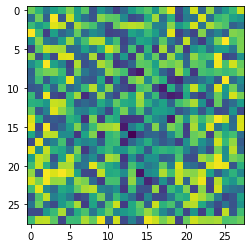

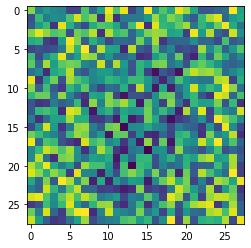

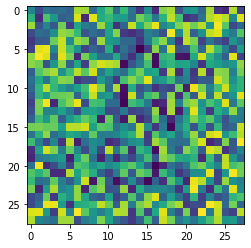

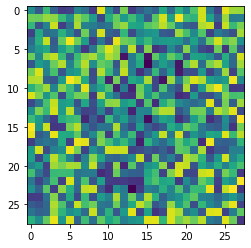

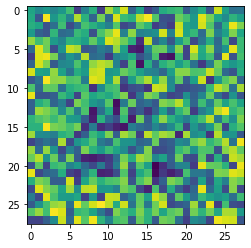

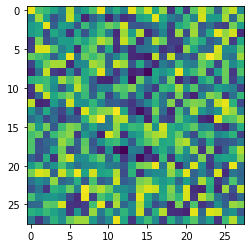

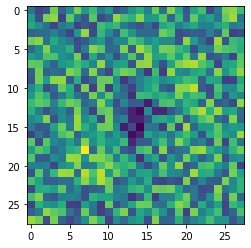

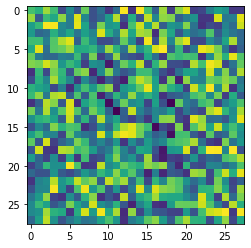

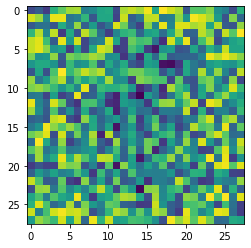

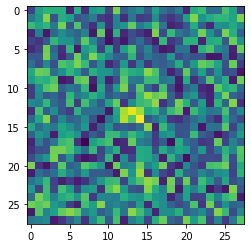

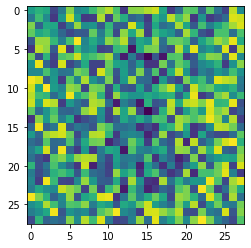

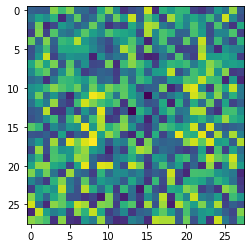

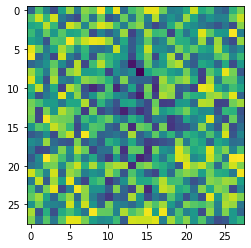

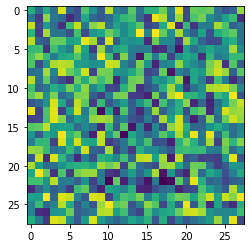

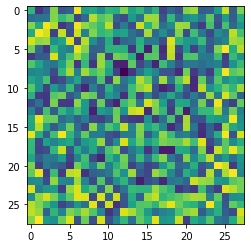

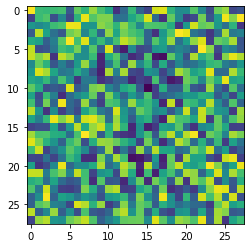

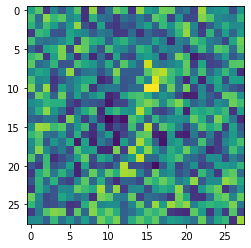

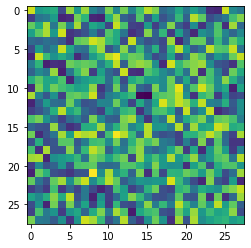

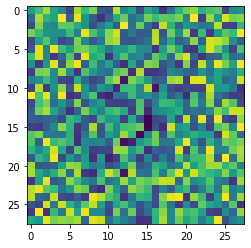

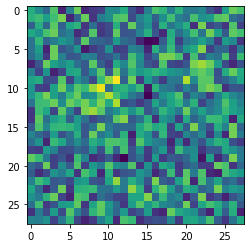

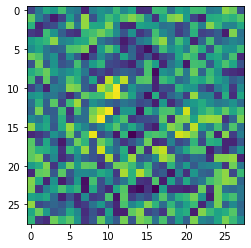

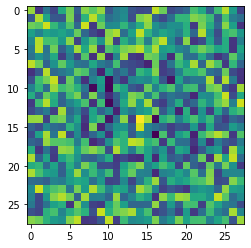

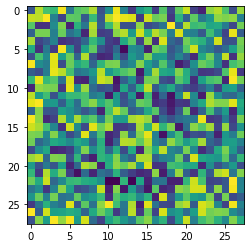

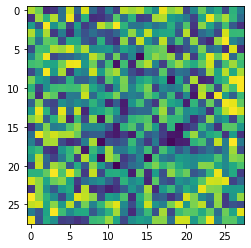

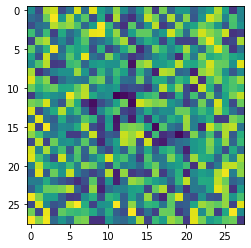

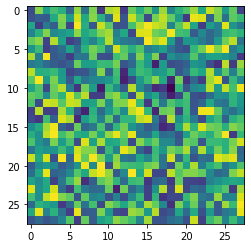

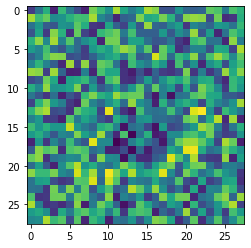

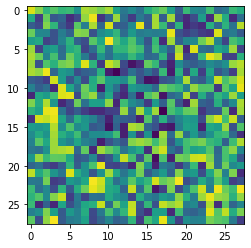

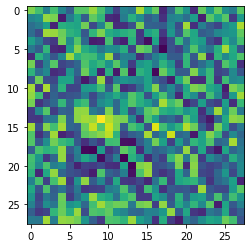

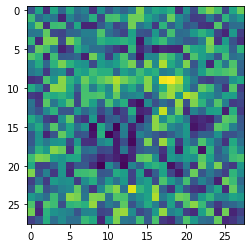

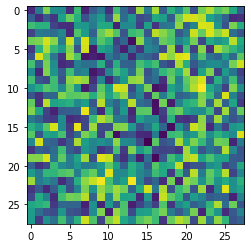

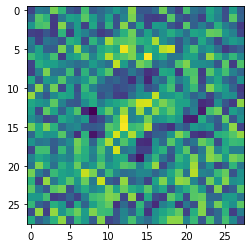

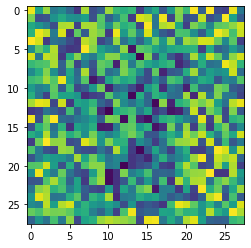

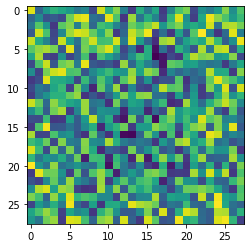

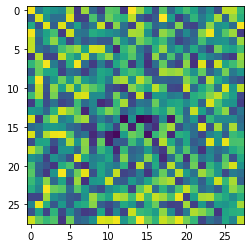

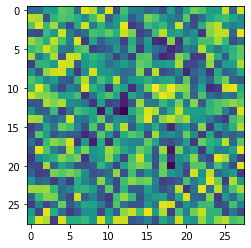

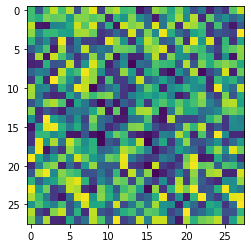

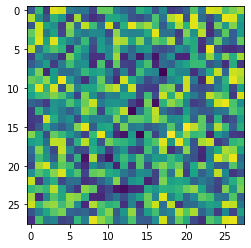

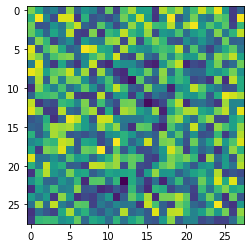

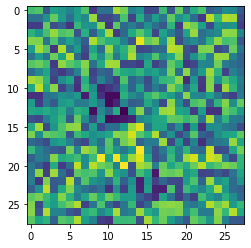

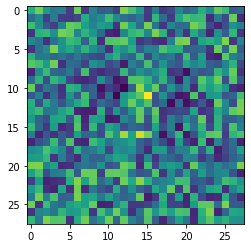

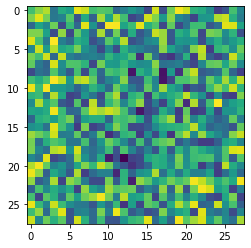

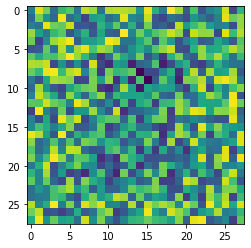

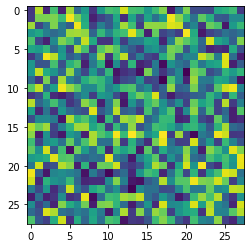

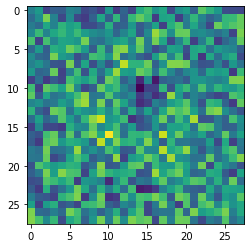

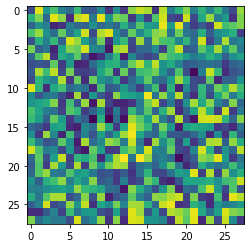

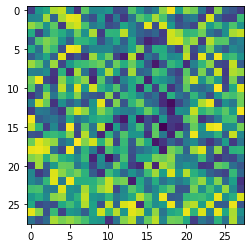

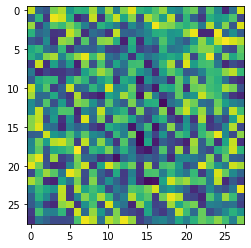

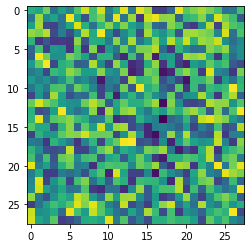

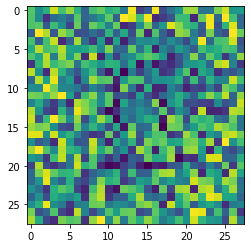

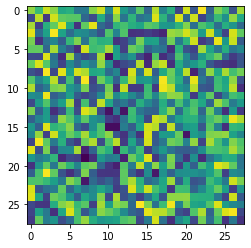

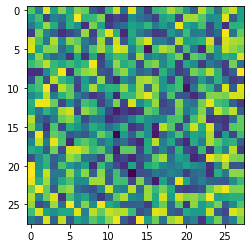

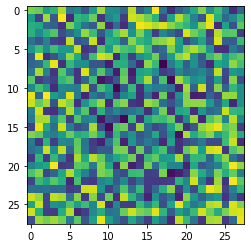

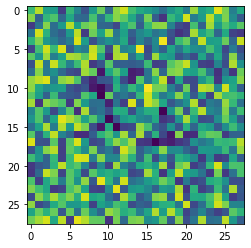

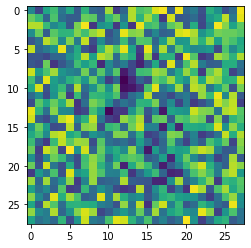

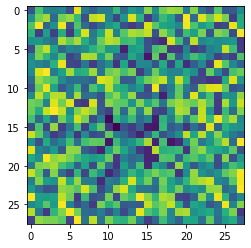

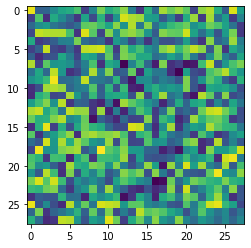

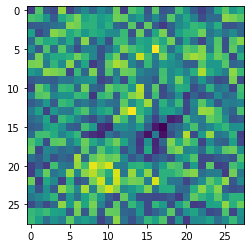

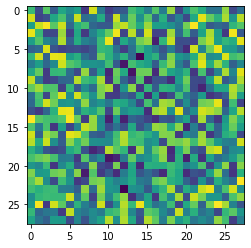

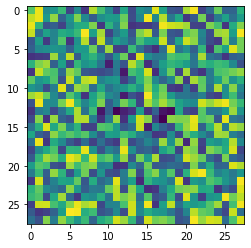

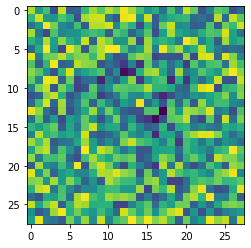

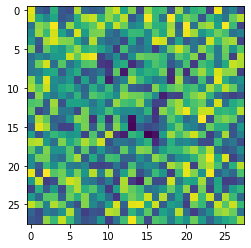

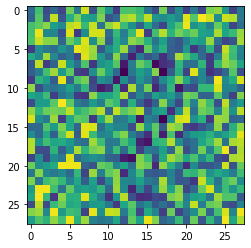

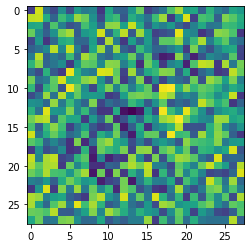

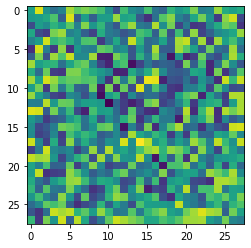

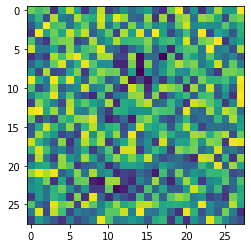

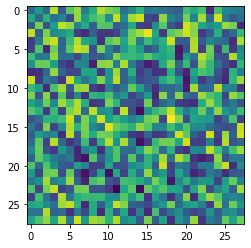

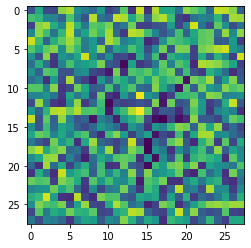

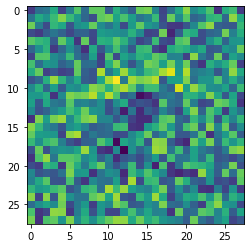

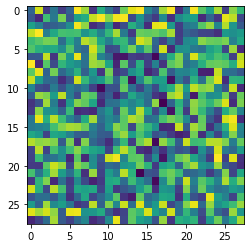

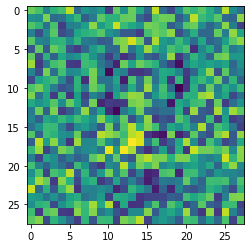

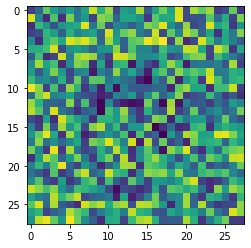

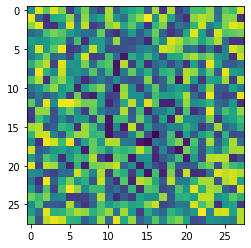

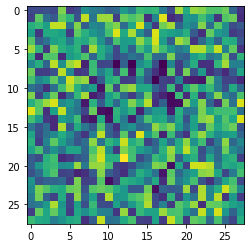

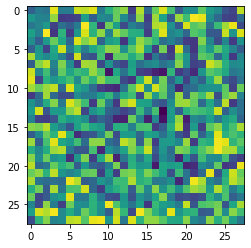

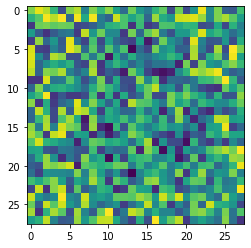

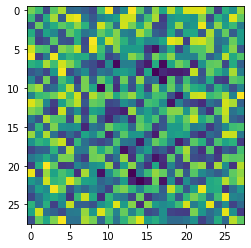

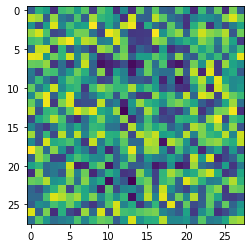

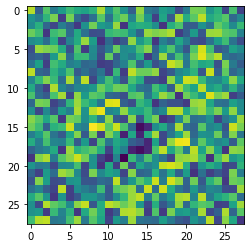

In [ ]:
from matplotlib import pyplot as plt

for i in range(hidden_layer_nodes):
  data = weights1[i,1:]
  data.shape = (28, 28)
  plt.imshow(data, interpolation='nearest')
  plt.show()